In [178]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import FancyArrowPatch

from skimage.filters import threshold_otsu, threshold_local
from skimage import measure
import skimage as image_tool
from skimage.measure import find_contours
from skimage import io
from skimage import morphology

import scipy
from scipy import ndimage

import General_function as tools

In [179]:
# Read the image
image = mpimg.imread('brain_tumors.jpg')

# this is the image
# plt.imshow(image)

In [180]:
# Convert to grayscale function 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [181]:
gray_image = rgb2gray(image)
gray_image = np.around(gray_image)
gray_image = np.uint8(gray_image)

(-0.5, 547.5, 682.5, -0.5)

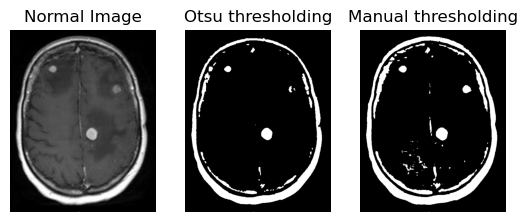

In [182]:
# Otsu thresholding
thresh = threshold_otsu(gray_image)
Image_Binary_otsu = gray_image > thresh
Image_Binary_otsu = Image_Binary_otsu.astype(int)

# Manual thresholding
thresh = 90 # this is the threshold
Image_Binary_manual = gray_image > thresh 
Image_Binary_manual = Image_Binary_manual.astype(int)

fig = plt.figure(1)
sub = fig.add_subplot(1,3,1)
plt.imshow(image,cmap=plt.cm.gray)
plt.title('Normal Image')                                                                                                                                                                                                           
plt.axis('off')


sub = fig.add_subplot(1,3,2)
plt.imshow(Image_Binary_otsu ,cmap=plt.cm.gray)
plt.title('Otsu thresholding')
plt.axis('off')

#plt.figure(1)
sub = fig.add_subplot(1,3,3)
plt.imshow(Image_Binary_manual ,cmap=plt.cm.gray)
plt.title('Manual thresholding')
plt.axis('off')

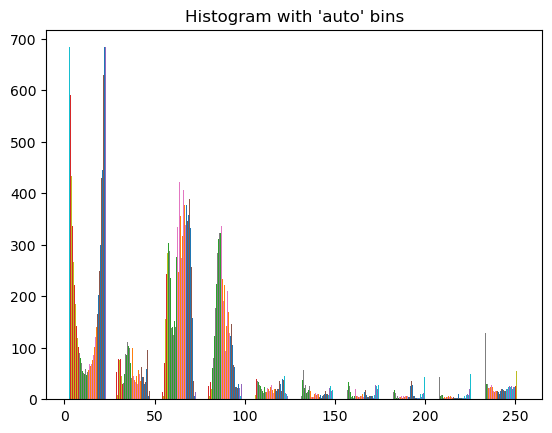

In [183]:
#show the histogram of the image
plt.figure(2)
hist1= plt.hist(gray_image, bins=10)
plt.title("Histogram with 'auto' bins")
plt.show()    

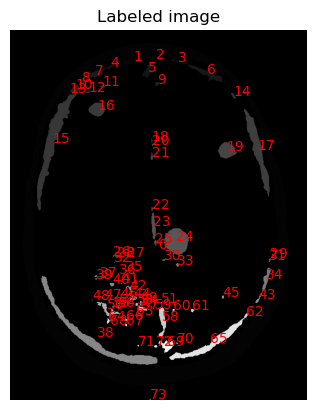

In [184]:

[Labeled_image, num_of_neighbors] = measure.label(Image_Binary_manual, connectivity = 1, background = False, return_num = True)
Group_connected_list = image_tool.measure.regionprops(Labeled_image)


plt.figure()
plt.imshow(Labeled_image, cmap = plt.cm.gray)
plt.title('Labeled image')
plt.axis('off')
# this is the centroid of the image
for i in range(num_of_neighbors): 
    plt.annotate(i, xy = (Group_connected_list[i].centroid[1],Group_connected_list[i].centroid[0]), color='red')

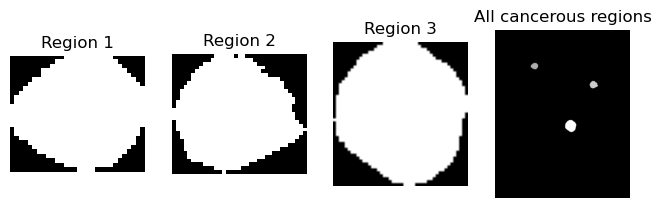

In [185]:
cancerous_labels = [16, 19, 24]  # list of cancerous labels
cancerous_regions = [Group_connected_list[i] for i in cancerous_labels]  # get cancerous regions

# create a new image with only cancerous regions
cancerous_image = np.zeros_like(Labeled_image)

# fill the cancerous regions with the original image
for region in cancerous_regions:
    rr, cc = region.coords.T # get the coordinates of the region
    cancerous_image[rr, cc] = Labeled_image[rr, cc] # fill the cancerous regions with the original image

# display the cancerous image
# plt.figure()
# plt.imshow(cancerous_image, cmap=plt.cm.gray)

# create a figure with a single subplot
fig = plt.figure(figsize=(8, 3))

# display each cancerous region in the subplot
for i, region in enumerate(cancerous_regions):
    ax = fig.add_subplot(1, len(cancerous_regions)+1, i+1)
    ax.imshow(region.image, cmap=plt.cm.gray)
    ax.axis("off")
    ax.set_title(f"Region {i+1}")

# display all cancerous regions together
ax = fig.add_subplot(1, len(cancerous_regions)+1, len(cancerous_regions)+1)
ax.imshow(cancerous_image, cmap=plt.cm.gray)
ax.axis("off")
ax.set_title("All cancerous regions")

plt.show()


In [186]:
# compute the area and shape of each region
regions = measure.regionprops(cancerous_image)
areas = [region.area for region in regions]
shape_factor = [4*np.pi*region.area/region.perimeter**2 for region in regions]

print(regions, areas, shape_factor)

[<skimage.measure._regionprops.RegionProperties object at 0x7f4ae17c0970>, <skimage.measure._regionprops.RegionProperties object at 0x7f4ae17c2740>, <skimage.measure._regionprops.RegionProperties object at 0x7f4ae18c3520>] [585, 725, 1663] [0.9350215988108153, 0.8011443456630876, 0.897294784813061]


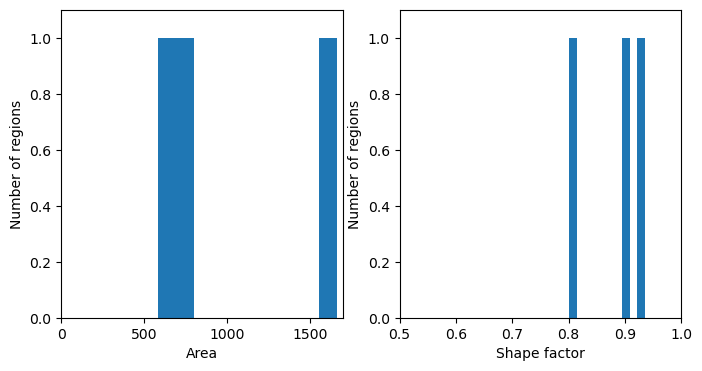

In [187]:
# create histograms of the areas and shape factors
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(areas, bins=10)
plt.xlabel("Area")
plt.ylabel("Number of regions")
# show axis with more detail
plt.axis([0, 1700, 0, 1.1])

plt.subplot(1, 2, 2)
plt.hist(shape_factor, bins=10)
plt.xlabel("Shape factor")
plt.ylabel("Number of regions")
plt.axis([0.5, 1, 0, 1.1])

plt.show()


In [188]:
for region in cancerous_regions:
    print(f"Region {region.label - 1}: area = {region.area}")


Region 16: area = 585
Region 19: area = 725
Region 24: area = 1663


# Based on the histograms of the area and shape factor of the regions, it appears that the three volumes can be distinguished from the other regions. The volumes have larger areas and a different shape factor compared to the other regions. This suggests that it may be possible to isolate the volumes from the rest of the regions using these properties. Further investigation is needed to confirm this conclusion and to determine the most effective method for isolating the volumes.

----------------------------------------------------------------------------
Task 5

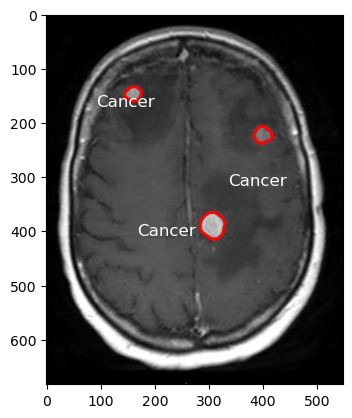

In [189]:
cancerous_labels = [16, 19, 24]  # list of cancerous labels
cancerous_regions = [Group_connected_list[i] for i in cancerous_labels]  # get cancerous regions

for region in cancerous_regions:
    rr, cc = region.coords.T # get the coordinates of the region
    cancerous_image[rr, cc] = Labeled_image[rr, cc] # fill the cancerous regions with the original image

contours = measure.find_contours(cancerous_image, 0.5)

# display the contours
plt.imshow(gray_image, cmap='gray')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')
    # add label to the center of the contour
    x, y = np.mean(contour, axis=0).astype(int)
    plt.annotate('Cancer', (x, y), color='white', fontsize=12, ha='center', va='center',
                 arrowprops={'arrowstyle': '->', 'color': 'white', 'lw': 1})
plt.show()





-------------------------------------------------------------------------------------
Step 6

In [190]:
#Mask
#Mask_Crucifix = scipy.ndimage.generate_binary_structure(2, 1)
#Mask_Crucifix=np.asarray(Mask_Crucifix, dtype=np.int32) #convert to int32

Mask_Rectangle = image_tool.morphology.rectangle(3,5)#OR Mask_Rectangle=np.ones((3,5))
Mask = np.asarray(Mask_Rectangle, dtype=np.int32)

# Display the mask


#Erosion
Image_erosion = scipy.ndimage.binary_erosion(Image_Binary_manual, Mask)
Image_erosion = np.asarray(Image_erosion, dtype=np.int32)

#Dilation
Image_dilation = scipy.ndimage.binary_dilation(Image_Binary_manual, Mask)
Image_dilation = np.asarray(Image_dilation, dtype=np.int32)


In [191]:
# Opening
opening = scipy.ndimage.binary_erosion(Image_dilation,Mask)
opening =np.asarray(opening, dtype=np.int32)

# Closing
closing = scipy.ndimage.binary_dilation(Image_erosion,Mask)
closing = np.asarray(closing, dtype=np.int32)

In [192]:
# Inside contour
inside_contour = Image_Binary_manual - Image_erosion

# Outside contour
outside_contour = Image_dilation - Image_Binary_manual

# Morphological gradient
morphological_gradient = Image_dilation - Image_erosion

In [193]:
# Noise removal
noise_removal = scipy.ndimage.binary_erosion(closing,Mask)
noise_removal = np.asarray(noise_removal, dtype=np.int32)

# Image skeletonize
Image_skeletonize = image_tool.morphology.skeletonize(Image_Binary_manual)

Text(0.5, 1.0, 'Image skeletonize')

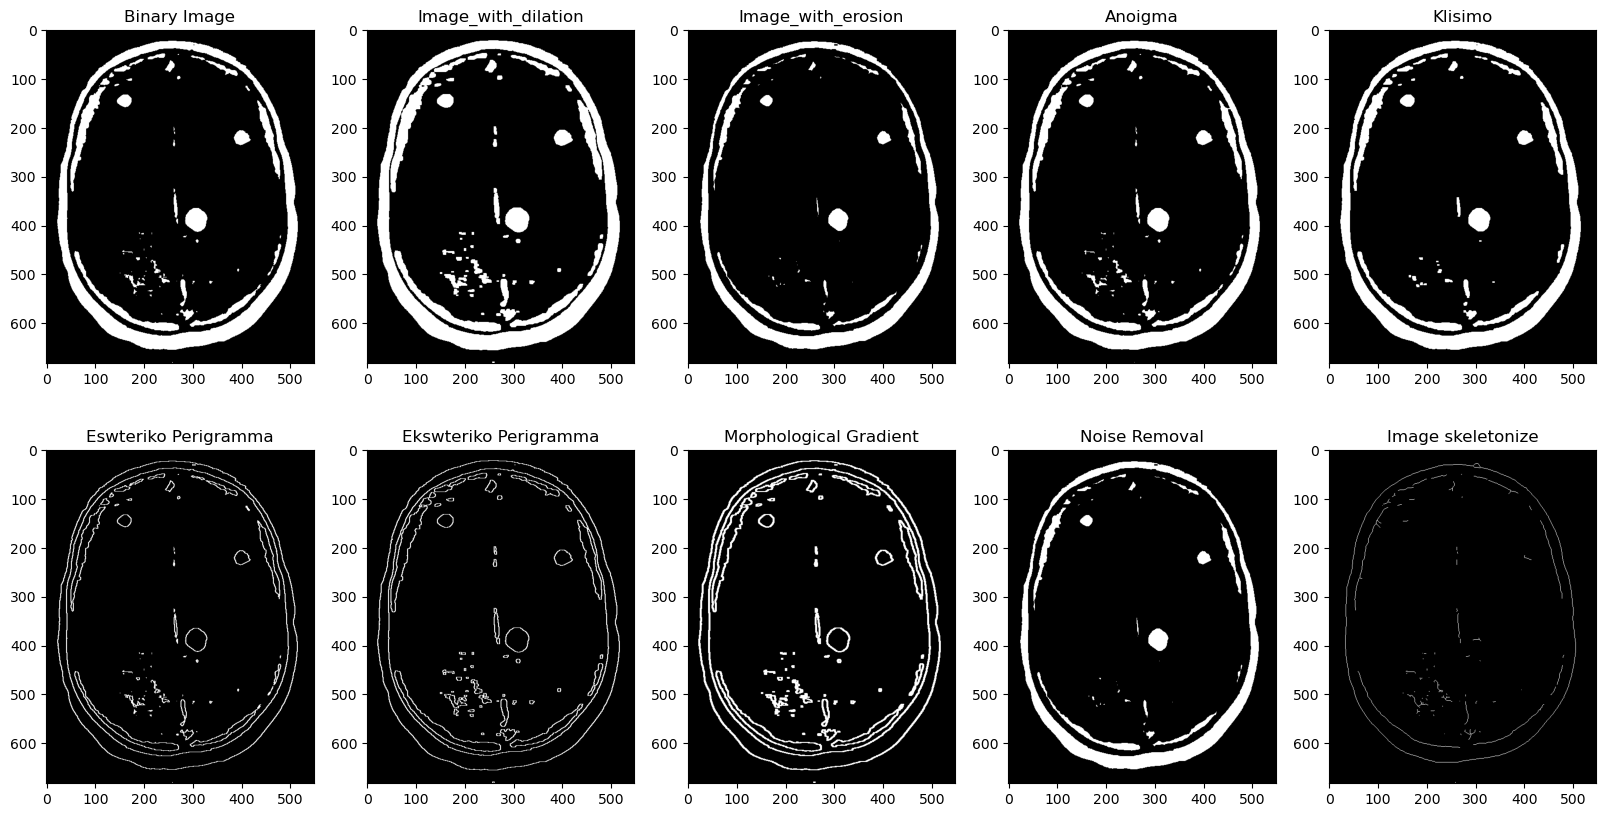

In [194]:
figure1 = plt.figure(1, figsize=(20, 10))

subplot1=figure1.add_subplot(2,5,1)
plt.imshow(Image_Binary_manual,cmap=plt.cm.gray)
subplot1.set_title('Binary Image')

subplot1=figure1.add_subplot(2,5,2)
plt.imshow(Image_dilation,cmap=plt.cm.gray)
subplot1.set_title('Image_with_dilation')

subplot1=figure1.add_subplot(2,5,3)
plt.imshow(Image_erosion,cmap=plt.cm.gray)
subplot1.set_title('Image_with_erosion')

subplot1=figure1.add_subplot(2,5,4)
plt.imshow(opening,cmap=plt.cm.gray)
subplot1.set_title('Anoigma')

subplot1=figure1.add_subplot(2,5,5)
plt.imshow(closing,cmap=plt.cm.gray)
subplot1.set_title('Klisimo')
    
subplot1=figure1.add_subplot(2,5,6)
plt.imshow(inside_contour,cmap=plt.cm.gray)
subplot1.set_title('Eswteriko Perigramma')

subplot1=figure1.add_subplot(2,5,7)
plt.imshow(outside_contour,cmap=plt.cm.gray)
subplot1.set_title('Ekswteriko Perigramma')

subplot1=figure1.add_subplot(2,5,8)
plt.imshow(morphological_gradient,cmap=plt.cm.gray)
subplot1.set_title('Morphological Gradient')

subplot1=figure1.add_subplot(2,5,9)
plt.imshow(noise_removal,cmap=plt.cm.gray)
subplot1.set_title('Noise Removal')

subplot1=figure1.add_subplot(2,5,10)
plt.imshow(Image_skeletonize,cmap=plt.cm.gray)
subplot1.set_title('Image skeletonize')
